## Camera Calibration 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

In [2]:
# List of paths of camera calibration images
image_names = glob.glob("camera_cal/*")

In [3]:
# Number of inner corners per row and column
nx = 9
ny = 6

In [4]:
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

In [5]:
# Prepare object points by creating  6x8 points in an array each with 3 columns for the x,y,z coordinates of each corner

objp = np.zeros((ny*nx, 3), np.float32)

In [6]:
# Use numpy mgrid function to generate the coordinates that we want

objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

In [7]:
# Loop through all the calibration images
for name in image_names:
    # Read in the image
    img = mpimg.imread(name)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
    if(ret):
        image = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        #If corners are found, add image points and object points
        imgpoints.append(corners)
        # Object points will be the same for all of the calibration images
        # Since they represent a real chessboard
        objpoints.append(objp)


In [8]:
# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)

## Un-Distort

In [9]:
def undistort(image):
    """
        Simple wrapper that un distorts an image
        Using previously computed camera matrix and
        distortion coefficients
    """
    return cv2.undistort(img, mtx, dist)

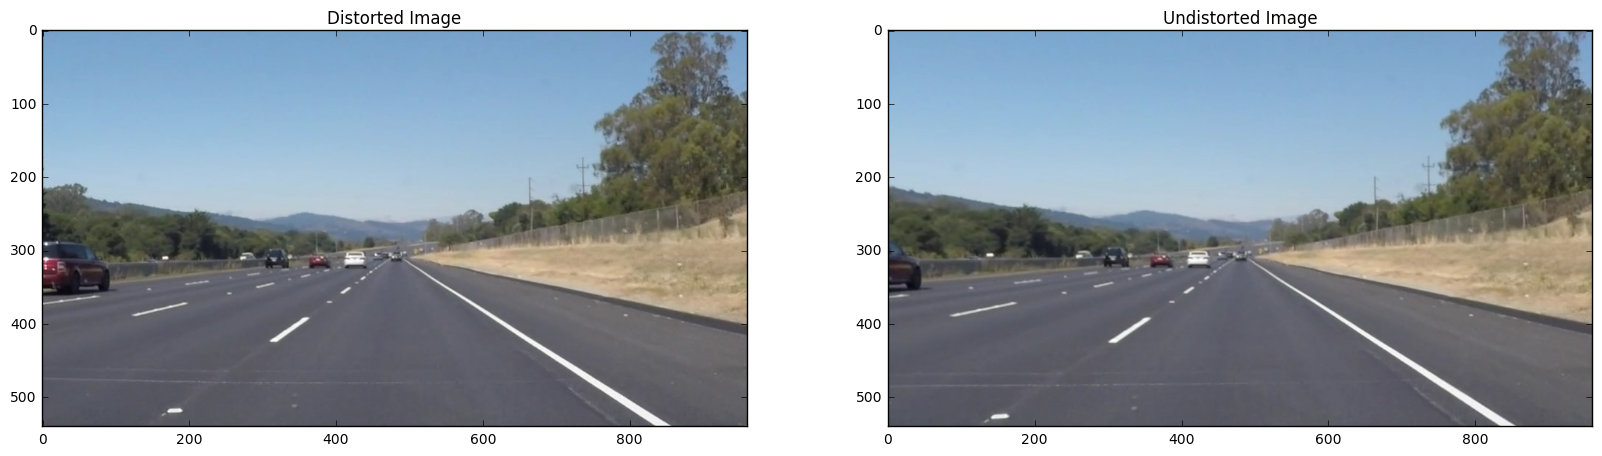

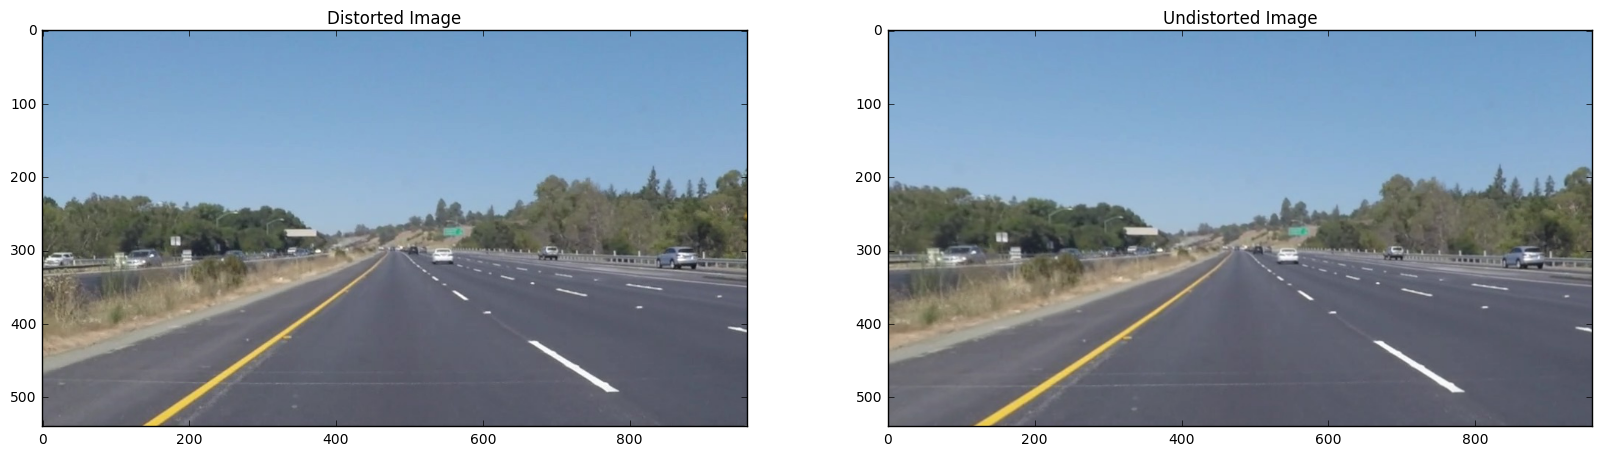

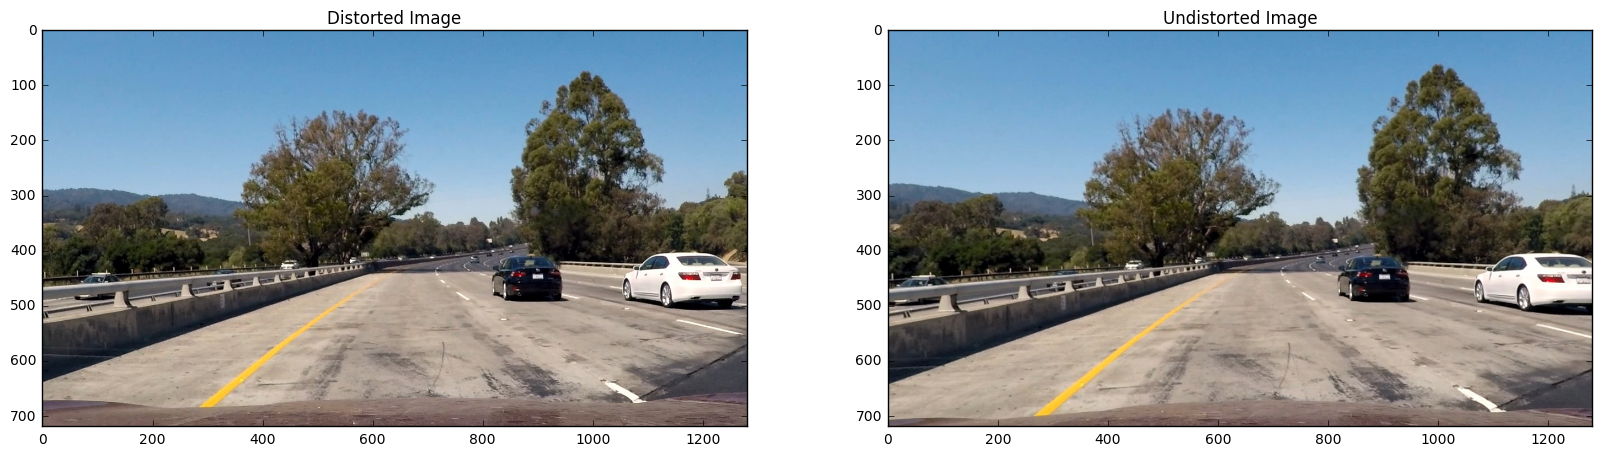

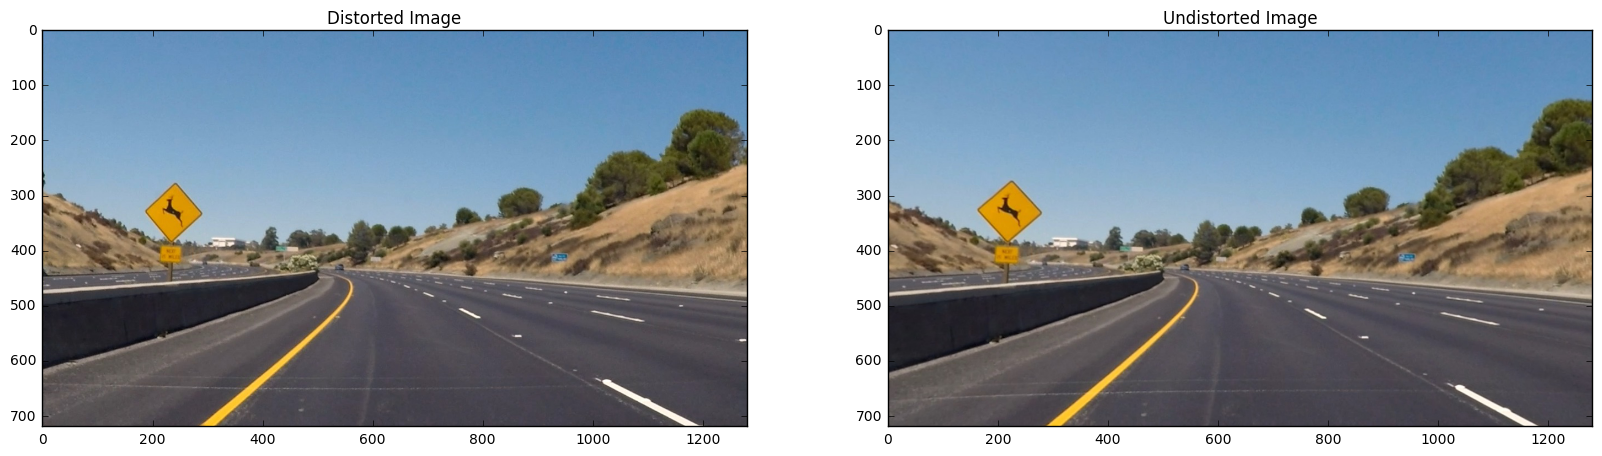

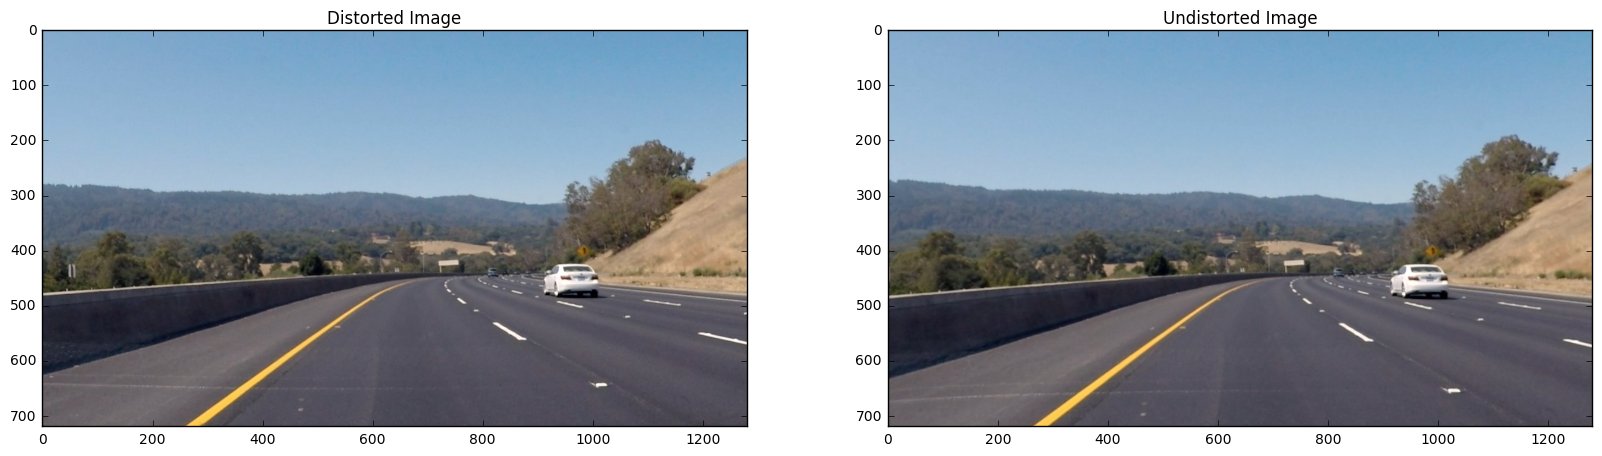

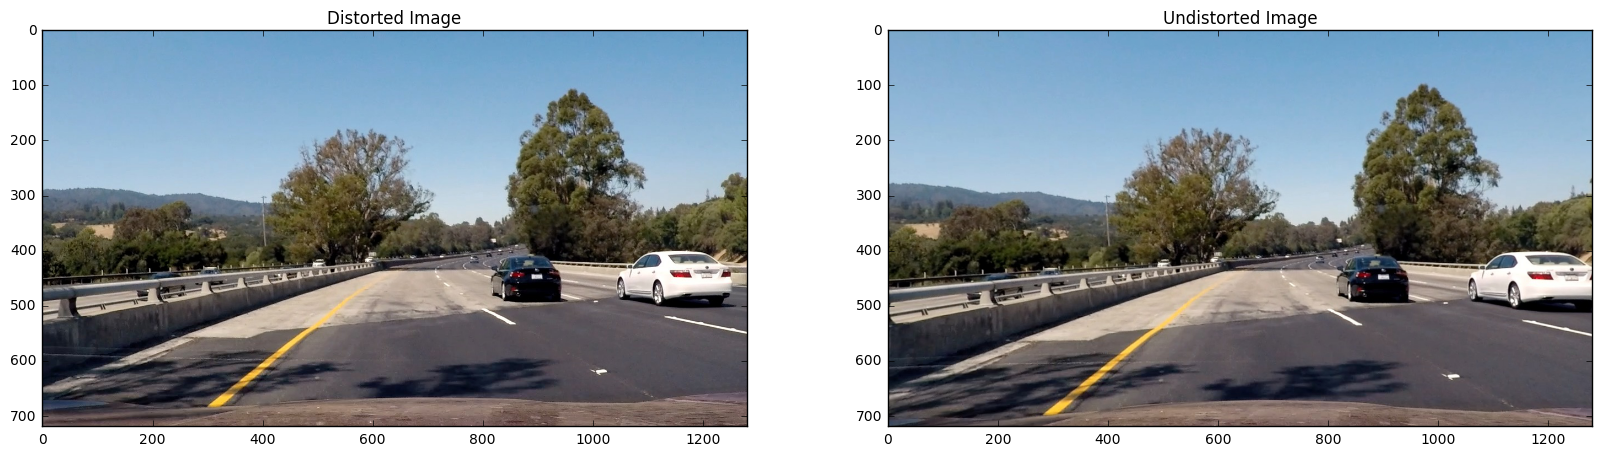

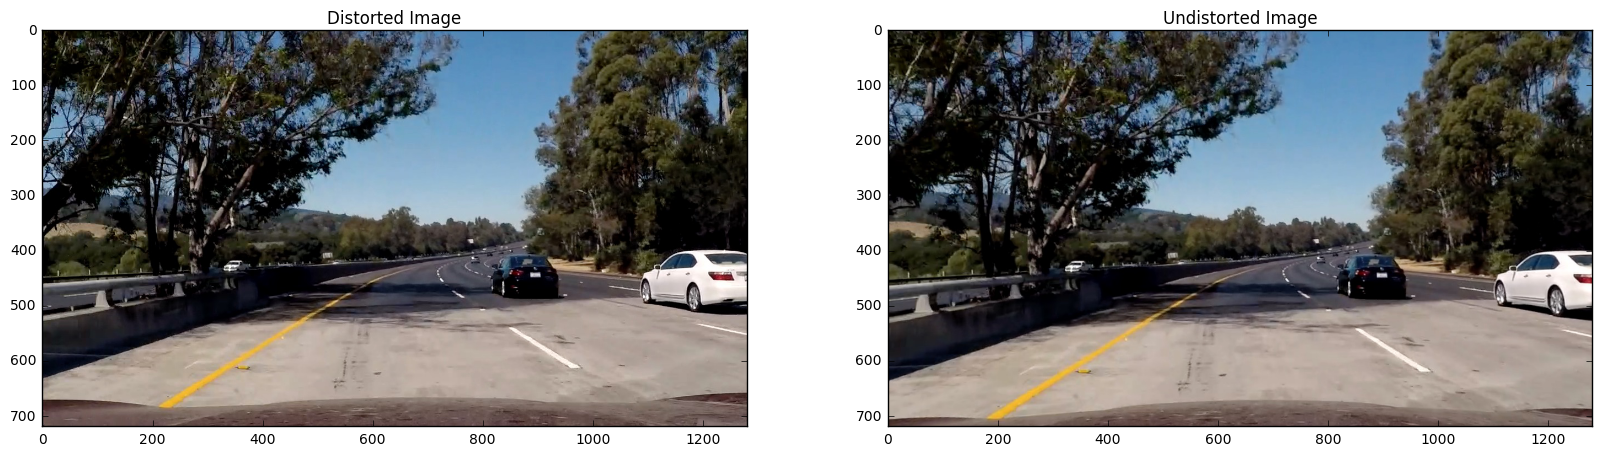

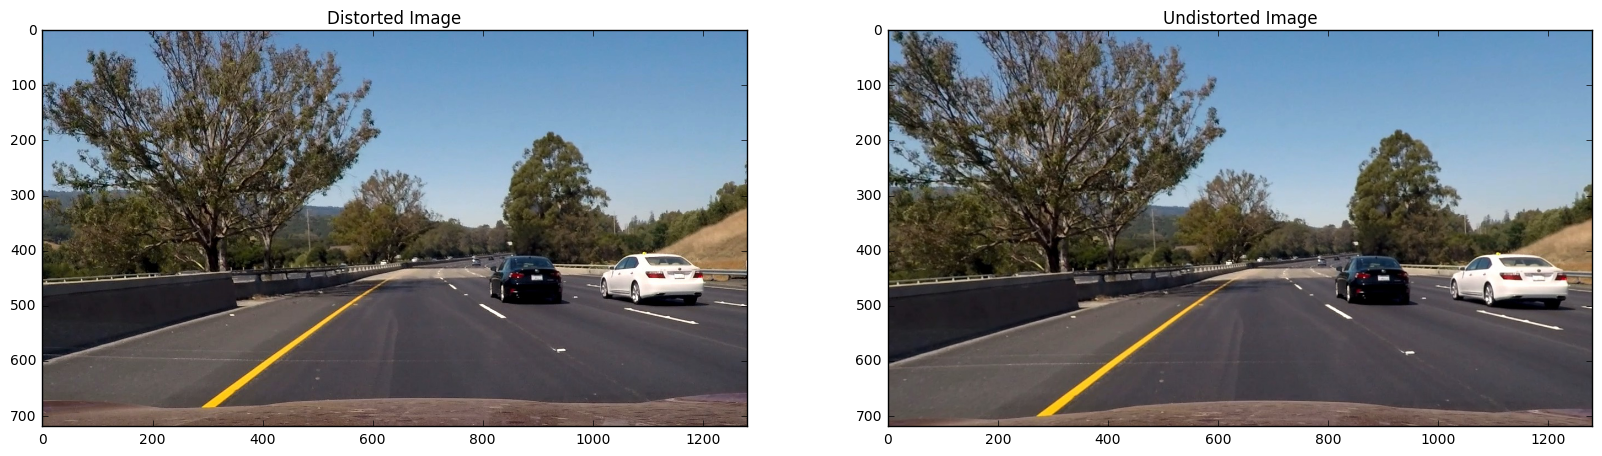

In [10]:
# Perform un-distortion on the test images
for image_name in glob.glob("test_images/*"):
    img = mpimg.imread(image_name)
    un_dist = undistort(img)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    
    
    ax1.imshow(img)
    ax1.set_title("Distorted Image")

    ax2.imshow(un_dist)
    ax2.set_title("Undistorted Image")
    
    plt.show()

## Binary Image generator

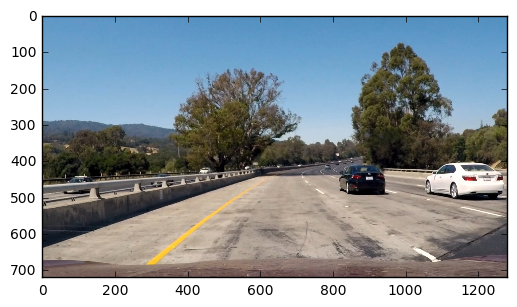

In [16]:
image = mpimg.imread(glob.glob("test_images/*")[2])
plt.imshow(image)

In [32]:
def get_sobel_binary(image, thresh_min=20, thresh_max=100):
    """
        Return a binary images after application
        of a sobel filter and thresholds to the result
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Take the derivative in x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) 
    
    # Absolute x derivative to accentuate lines away from horizontal
    abs_sobelx = np.absolute(sobelx) 
    
    # Scale to 8 bit grayscale image
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Apply a threshold
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

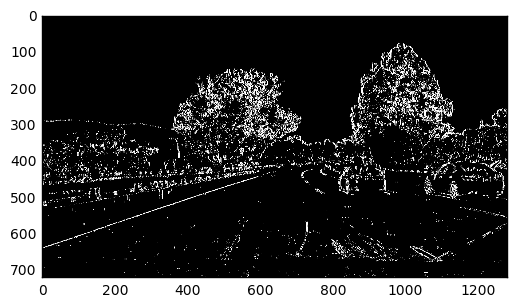

In [33]:
sobel_binary = get_sobel_binary(image)
plt.imshow(sobel_binary, cmap="gray")

In [34]:
def get_channel_index_hls(chanel_name):
    """
        Returns the index of each channel
        for an image in HLS color channel
    """
    if(chanel_name == "h"):
        return 0
    elif(chanel_name == "l"):
        return 1
    elif(chanel_name == "s"):
        return 2

In [35]:
def get_hls_channel_binary(image, channel_name='s', thresh_min=170, thresh_max=255):
    # Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # Extract the desired channel
    channel_index = get_channel(channel_name)
    channel = hls[:,:,channel_index]
    
    # Apply the threshold
    channel_binary = np.zeros_like(channel)
    channel_binary[(channel >= thresh_min) & (channel <= thresh_max)] = 1
    
    return channel_binary    

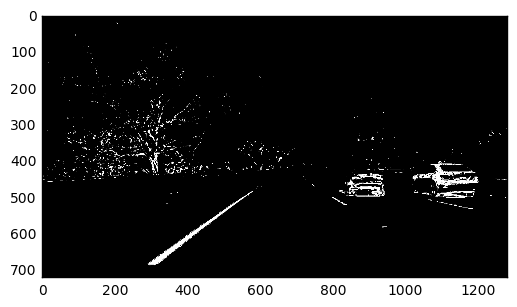

In [36]:
s_binary = get_hls_channel_binary(image)
plt.imshow(s_binary, cmap="gray")

In [37]:
def get_binary_image(image):
    """
        Combines both gradient and color channel
        thresholds to create a binary image
    """
    sobel_binary = get_sobel_binary(image)
    
    s_channel_binary = get_hls_channel_binary(image)
    
    combined_binary = np.zeros_like(sobel_binary)
    
    combined_binary[(sobel_binary == 1) | (s_channel_binary == 1)] = 1
    
    return combined_binary

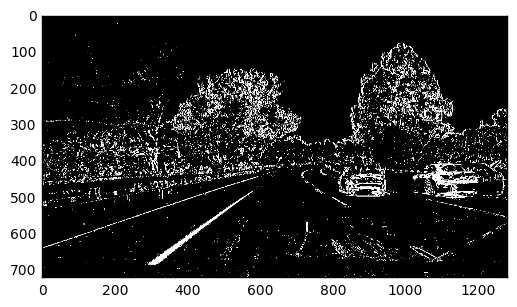

In [39]:
binary = get_binary_image(image)
plt.imshow(binary, cmap="gray")